# **Measuring Bias in multiclass classification**


This tutorial will explain how to measure bias in a multiclass classification task using the holisticai library. We will introduce here some of the functions that can help study algorithmic bias.

The sections are organised as follows :
1. Load the data : we load the student dataset as a pandas DataFrame
2. Data Exploration : some preliminary analysis of the data
3. Train a Model : we train a model (sklearn)
4. Measure Bias : we compute a few bias metrics, and comment on their meaning

## **Load the data**

First of all, we need to import the required packages to perform our bias analysis and mitigation. You will need to have the `holisticai` package installed on your system, remember that you can install it by running: 
```bash
!pip install holisticai[all]
```

In [1]:
# Imports
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

The student dataset can be easily

In [2]:
from holisticai.datasets import load_dataset
df, p_attr = load_dataset(dataset='student', preprocessed=True, as_array=False)
df

,school,sex,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,target
0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2.0,...,0.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,4.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,10.0,1.0
3,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,1.0,...,1.0,1.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0,3.0
4,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,1.0,1.0,...,0.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,1.0,...,0.0,0.0,5.0,5.0,4.0,4.0,5.0,4.0,11.0,1.0
391,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,0.0,2.0,...,1.0,0.0,2.0,4.0,5.0,3.0,4.0,2.0,3.0,3.0
392,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,...,0.0,0.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,0.0
393,1.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0,0.0,3.0,...,1.0,0.0,4.0,4.0,1.0,3.0,4.0,5.0,0.0,1.0


## **Data Exploration**

In [3]:
from holisticai.plots.bias import group_pie_plot
from holisticai.plots.bias import histogram_plot
from holisticai.plots.bias import frequency_matrix_plot
from holisticai.plots.bias import frequency_plot

<Axes: >

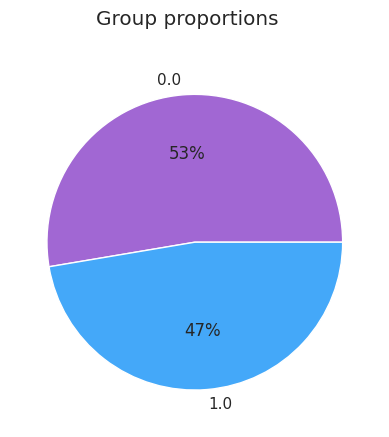

In [5]:
group_pie_plot(df['sex'])

<Axes: >

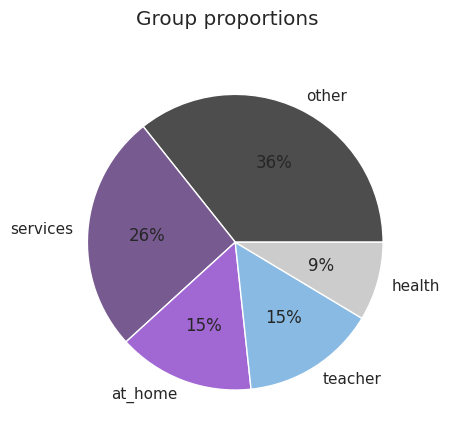

In [6]:
group_pie_plot(p_attr)

<Axes: xlabel='target', ylabel='Probability'>

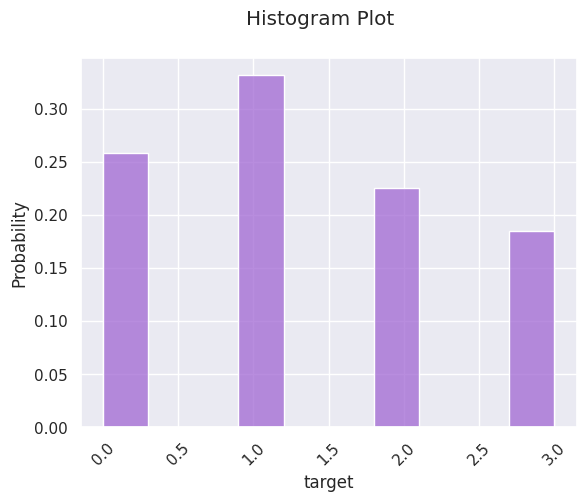

In [7]:
histogram_plot(df['target'])

<Axes: xlabel='Class', ylabel='Group'>

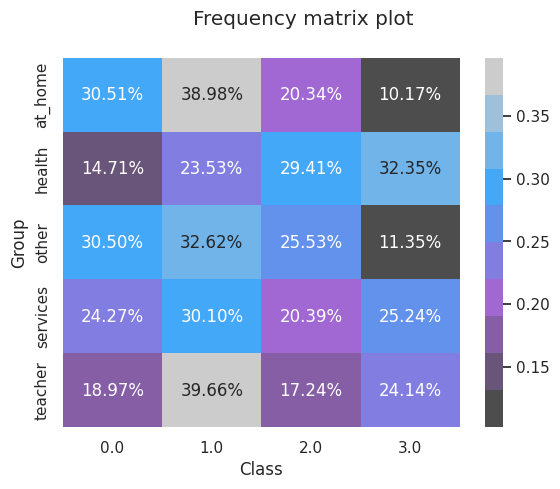

In [8]:
frequency_matrix_plot(p_attr, df['target'], normalize='group')

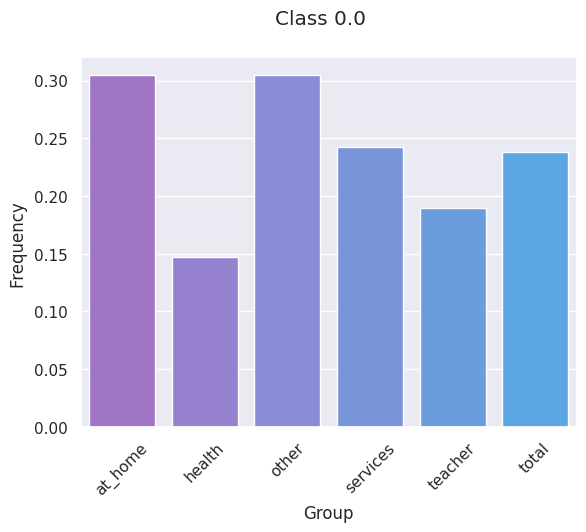

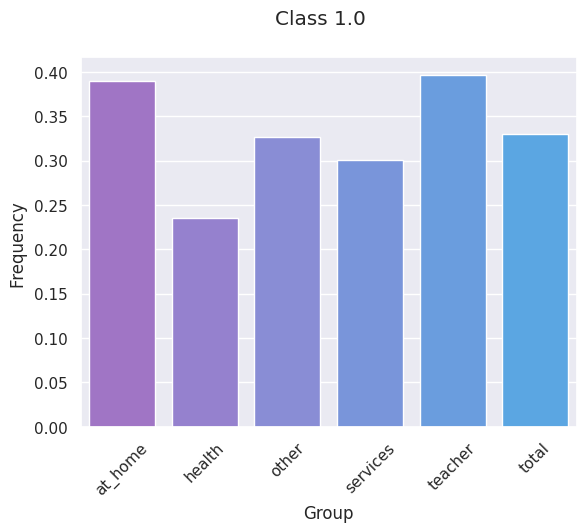

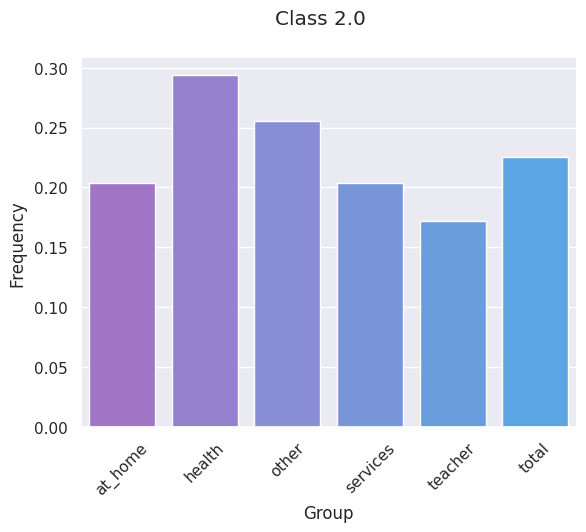

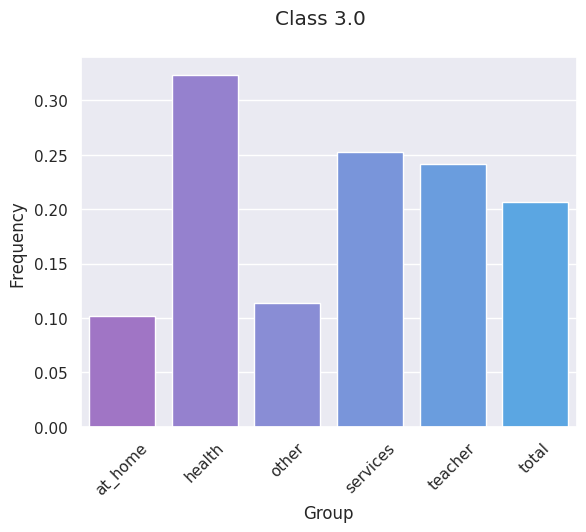

In [9]:
frequency_plot(p_attr, df['target'])

## **Train a model**


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train,X_test,y_train,y_test, p_attr_tr, p_attr_ts = \
    train_test_split(X, y, p_attr, test_size=0.2, random_state=42)

In [12]:
# Train a simple Random Forest Classifier
model = RandomForestClassifier(random_state=111)
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

In [13]:
from holisticai.bias.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [15]:
confusion_matrix(y_pred, y_test)

,0.0,1.0,2.0,3.0
0.0,9.0,6.0,1.0,1.0
1.0,12.0,10.0,8.0,7.0
2.0,0.0,2.0,6.0,6.0
3.0,1.0,3.0,1.0,6.0


In [17]:
# evaluate
print (accuracy_score(y_test, y_pred))
print (precision_score(y_test, y_pred, average=None))
print (recall_score(y_test, y_pred, average=None))

0.3924050632911392
[0.52941176 0.27027027 0.42857143 0.54545455]
[0.40909091 0.47619048 0.375      0.3       ]


## **Measure bias**

In [18]:
from holisticai.plots.bias import frequency_matrix_plot
from holisticai.plots.bias import frequency_plot

In [19]:
y_pred = model.predict(X_test)   # multiclass prediction vector                                                 # multiclass label vector

<Axes: xlabel='Class', ylabel='Group'>

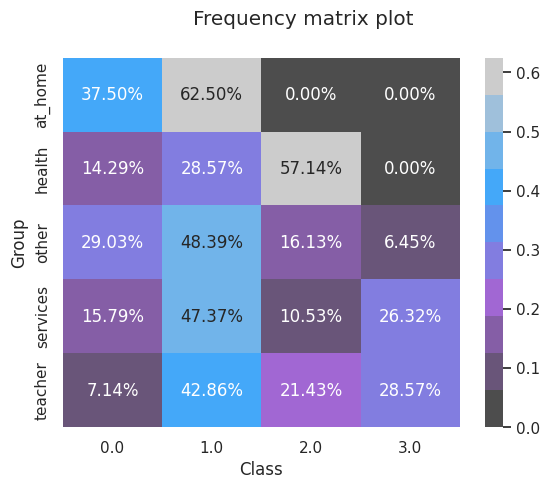

In [21]:
frequency_matrix_plot(p_attr_ts, y_pred, normalize='group')

Using the above plot, we observe unfairness by looking at differences over columns. For instance we look at the class 1.0, and observe how the 'health' group has a much higher probability of being within it.

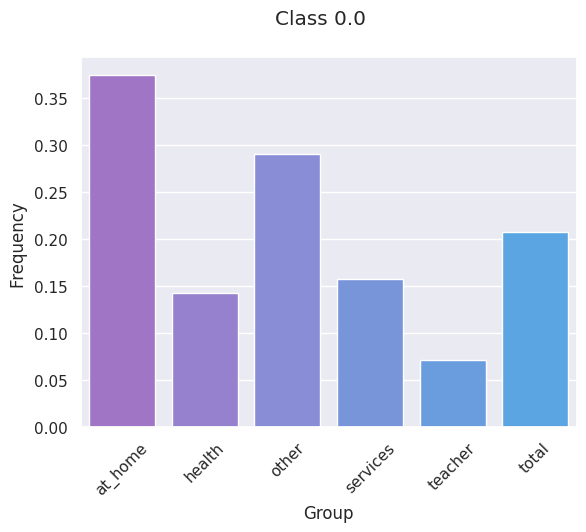

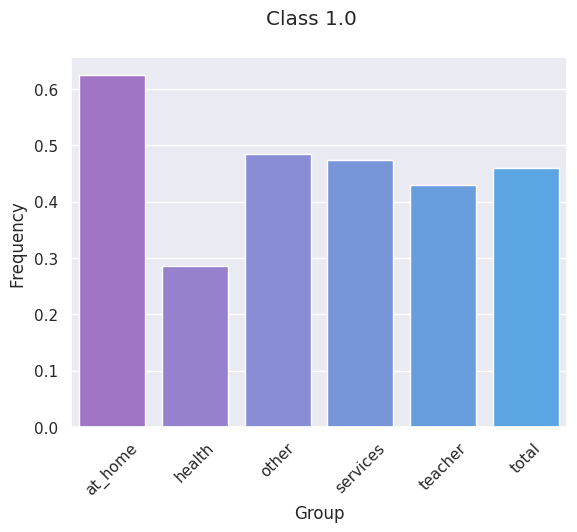

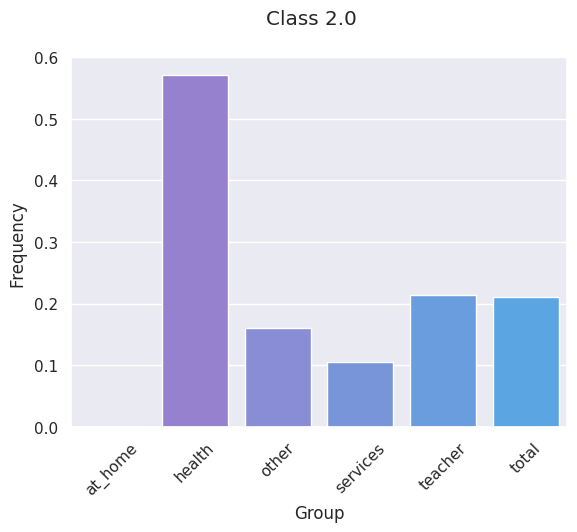

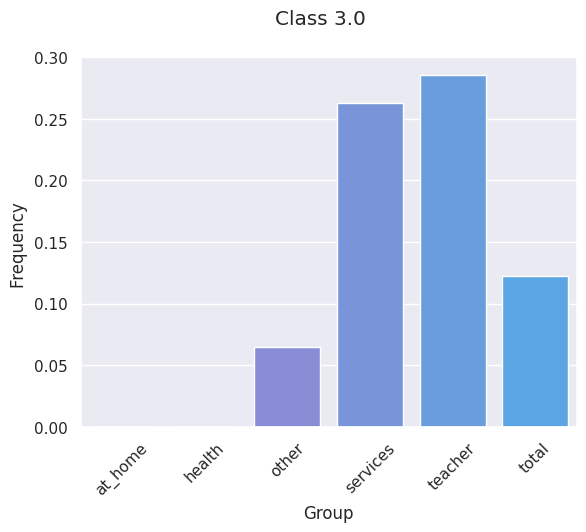

In [22]:
frequency_plot(p_attr_ts, y_pred)

This is the same data as the previous plot, but displayed in a different way.

Let's compute a few bias metrics. We have generalised versions of '1d' bias metrics. For instance multiclass statistical parity.

In [23]:
from holisticai.bias.metrics import multiclass_statistical_parity

multiclass_statistical_parity(
    p_attr_ts, y_pred, groups=None, classes=None, aggregation_fun="mean"
)

0.3574945428086345

We now compute statistical parity, generalized for the multiclass case. We aggregate by taking the average multilabel statistical parity over all possible group pairs (`aggregation_fun="mean"`). As in the 1d case, the suggested accepted range is (-0.1, 0.1).

In [24]:
multiclass_statistical_parity(
    p_attr_ts, y_pred, groups=None, classes=None, aggregation_fun="max"
)

0.5714285714285714

Alternatively, we could aggregate by taking the maximum (`aggregation_fun="max"`) over all possible group pairs. As expected, the maximum statistical parity is higher in this case.

We can try another bias metric, for instace multiclass_equality_of_opp is the multidimensional version of the 1d equal opportunity metric.

In [26]:
from holisticai.bias.metrics import multiclass_equality_of_opp

multiclass_equality_of_opp(
    p_attr_ts, y_pred, y_test, groups=None, classes=None, aggregation_fun="mean"
)

0.6183964646464647

In [27]:
multiclass_equality_of_opp(
    p_attr_ts, y_pred, y_test, groups=None, classes=None, aggregation_fun="max"
)

0.7763888888888888